In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/media/nig/Data/Iris/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# padronizar os dados
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm'] # lista com nome dos atributos

x = data.loc[:, features].values # separando os valores dos atributos

y = data.loc[:, ['Species']].values # sepadando os valores das classes

x = StandardScaler().fit_transform(x) # padronizar as caracateristicas

pd.DataFrame(data=x, columns = features).head() # 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
# PCA Projection to 2D
pca =  PCA(n_components=2)

principal_componentes = pca.fit_transform(x)

principalDataFrame  = pd.DataFrame(data = principal_componentes , columns = ['principal componente 1', 'principal componente 2'])

In [7]:
# vendo a tabela gerada do PCA
principalDataFrame.head()

,principal componente 1,principal componente 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [10]:
# classes
data[['Species']].head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [11]:
# Concatenando DataFrame ao longo do eixo = 1. finalDf é o DataFrame final antes de plotar os dados.

finalDataFrame = pd.concat([principalDataFrame , data[['Species']]], axis = 1)
                              

In [12]:
finalDataFrame.head()

,principal componente 1,principal componente 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


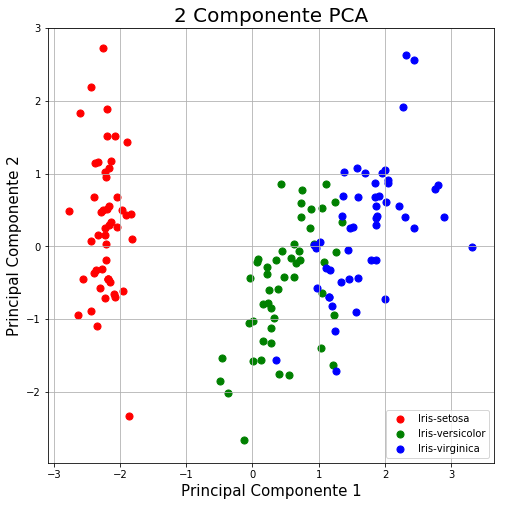

In [19]:
"""
# Visualize 2D Projection
Use uma projeção do PCA para 2d para visualizar todo o conjunto de dados. 
Você deve plotar classes diferentes usando cores ou formas diferentes.
""" 

fig  = plt.figure(figsize  =(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Componente 1', fontsize = 15)
ax.set_ylabel('Principal Componente 2', fontsize = 15)

ax.set_title('2 Componente PCA', fontsize=20)

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cores = ['r', 'g', 'b']

for classe, cor in zip(classes, cores):
    indiceValido = finalDataFrame['Species'] == classe
    ax.scatter(finalDataFrame.loc[indiceValido, 'principal componente 1']
              ,finalDataFrame.loc[indiceValido, 'principal componente 2']
              ,c=cor
              ,s=50)

ax.legend(classes)
ax.grid()

In [20]:

#A variância explicada nos diz quanta informação (variância) pode ser atribuída a cada um dos componentes principais

pca.explained_variance_ratio_



array([0.72770452, 0.23030523])

In [21]:
"""
Juntos, os dois primeiros componentes principais contêm 95,80% das informações. 
O primeiro componente principal contém 72,77% da variância e o segundo componente principal
contém 23,03% da variância. O terceiro e quarto componente principal continha o restante 
da variância do conjunto de dados.

Se o seu algoritmo de aprendizado for muito lento, porque a dimensão de entrada é muito alta, 
usar o PCA para acelerá-lo é uma opção razoável.
"""

'\nJuntos, os dois primeiros componentes principais contêm 95,80% das informações. \nO primeiro componente principal contém 72,77% da variância e o segundo componente principal\ncontém 23,03% da variância. O terceiro e quarto componente principal continha o restante \nda variância do conjunto de dados.\n\nSe o seu algoritmo de aprendizado for muito lento, porque a dimensão de entrada é muito alta, \nusar o PCA para acelerá-lo é uma opção razoável.\n'